# A

In [26]:
import pandas as pd
file_path ="./database/IEDB/receptor_table_export_0714.xlsx"
IEDB_raw = pd.read_excel(file_path)
IEDB=IEDB_raw[['Epitope','CDR3_Curated_beita','Source Organism']]
IEDB = IEDB.dropna(subset=['CDR3_Curated_beita'])
column_mapping = {
    "CDR3_Curated_beita": "CDR3B",
    "Source Organism": "antigen_species"}
IEDB=IEDB.rename(columns=column_mapping)
IEDB['CDR3B_length'] = IEDB['CDR3B'].apply(len) 
IEDB['Epitope_length'] = IEDB['Epitope'].apply(len)
IEDB = IEDB[(IEDB[ 'CDR3B_length'].between(10, 18))] 
non_standard_aa_pattern = r'[^ACDEFGHIKLMNPQRSTVWY]'
special_chars_pattern = r'[!@#$%^&*(),.?":{}|<>]'
lowercase_pattern = r'[a-z]'
IEDB = IEDB[~IEDB['CDR3B'].str.contains(special_chars_pattern, regex=True, na=False)]
IEDB = IEDB[~IEDB['CDR3B'].str.contains(lowercase_pattern, regex=True, na=False)]
IEDB = IEDB[~IEDB['CDR3B'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
IEDB = IEDB[~IEDB['Epitope'].str.contains(special_chars_pattern, regex=True, na=False)]
IEDB = IEDB[~IEDB['Epitope'].str.contains(lowercase_pattern, regex=True, na=False)]
IEDB = IEDB[~IEDB['Epitope'].str.contains(non_standard_aa_pattern, regex=True, na=False)]
IEDB.drop_duplicates(subset=['CDR3B', 'Epitope'], keep='first', inplace=True)
group_c_f = IEDB[IEDB['CDR3B'].str.startswith('C') & IEDB['CDR3B'].str.endswith('F')]
group_other = IEDB[~(IEDB['CDR3B'].str.startswith('C') & IEDB['CDR3B'].str.endswith('F'))]


In [27]:
def pad_sequence(seq):
    current_length = len(seq)
    if current_length >= max_length:
        return seq 
    padding_needed = max_length - current_length
    midpoint = len(seq) // 2
    padded_sequence = seq[:midpoint] + ('-' * padding_needed) + seq[midpoint:]
    return padded_sequence


/tmp/ipykernel_19134/205599531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_c_f['CDR3B'] = group_c_f['CDR3B'].apply(pad_sequence)


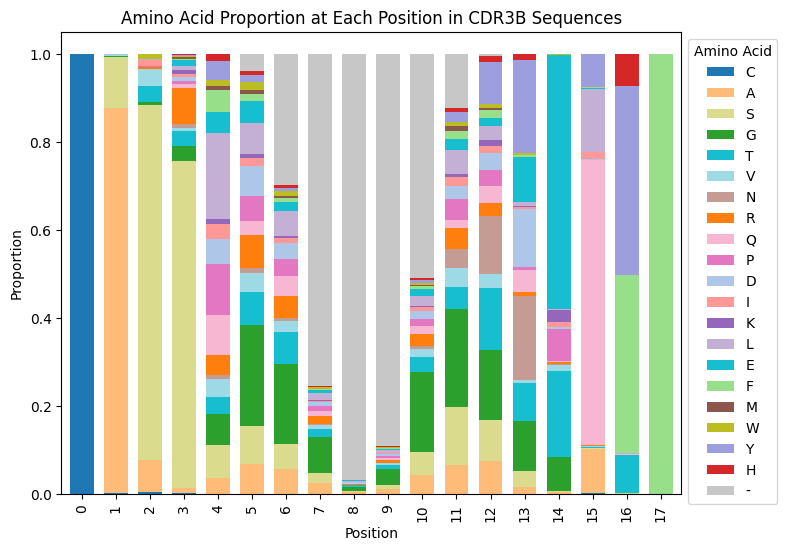

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
max_length = group_c_f['CDR3B'].str.len().max()
group_c_f['CDR3B'] = group_c_f['CDR3B'].apply(pad_sequence)
position_counts = {i: {} for i in range(max_length)}
amino_acids = set(''.join(group_c_f['CDR3B'])) 
for sequence in group_c_f['CDR3B']:
    for position, amino_acid in enumerate(sequence):
        if amino_acid in position_counts[position]:
            position_counts[position][amino_acid] += 1
        else:
            position_counts[position][amino_acid] = 1
position_frequencies = {}
for position, counts in position_counts.items():
    total = sum(counts.values())
    position_frequencies[position] = {aa: count / total for aa, count in counts.items()}
freq_df = pd.DataFrame(position_frequencies).fillna(0)  
plt.rcParams['pdf.fonttype'] = 42
colors = [
    "#c7c7c7",  "#ffbb78","#1f77b4", "#aec7e8", "#17becf", "#98df8a","#2ca02c", 
     "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2","#ff7f0e" ,
     "#dbdb8d", "#17becf", "#9edae5","#bcbd22","#9c9ede", "#17becf"]

color_map = {aa: colors[i % len(colors)] for i, aa in enumerate(sorted(amino_acids))}
ax = freq_df.T.plot(kind='bar', stacked=True, figsize=(8, 6), width=0.7,color=[color_map[aa] for aa in freq_df.index])

plt.title('Amino Acid Proportion at Each Position in CDR3B Sequences')
plt.xlabel('Position')
plt.ylabel('Proportion')
plt.legend(title='Amino Acid', bbox_to_anchor=(1, 1), loc='upper left')
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'A_TCR_Position_withCF.pdf', bbox_inches='tight')
plt.show()

# B

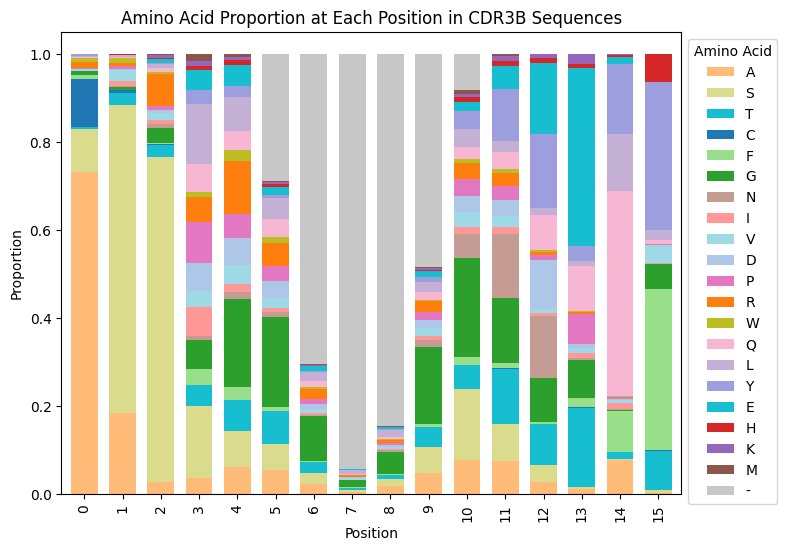

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
group_other = group_other[(group_other[ 'CDR3B_length'].between(10, 16))] 
max_length = group_other['CDR3B'].str.len().max()
group_other['CDR3B'] = group_other['CDR3B'].apply(pad_sequence)
position_counts = {i: {} for i in range(max_length)}
amino_acids = set(''.join(group_other['CDR3B']))  
for sequence in group_other['CDR3B']:
    for position, amino_acid in enumerate(sequence):
        if amino_acid in position_counts[position]:
            position_counts[position][amino_acid] += 1
        else:
            position_counts[position][amino_acid] = 1

position_frequencies = {}
for position, counts in position_counts.items():
    total = sum(counts.values())
    position_frequencies[position] = {aa: count / total for aa, count in counts.items()}
plt.rcParams['pdf.fonttype'] = 42
freq_df = pd.DataFrame(position_frequencies).fillna(0) 
color_map = {aa: colors[i % len(colors)] for i, aa in enumerate(sorted(amino_acids))}
ax = freq_df.T.plot(kind='bar', stacked=True, figsize=(8, 6), width=0.7, color=[color_map[aa] for aa in freq_df.index])

plt.title('Amino Acid Proportion at Each Position in CDR3B Sequences')
plt.xlabel('Position')
plt.ylabel('Proportion')
plt.legend(title='Amino Acid', bbox_to_anchor=(1, 1), loc='upper left')
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'B_TCR_Position_no_CF.pdf', bbox_inches='tight')
plt.show()

# C Three types of patients

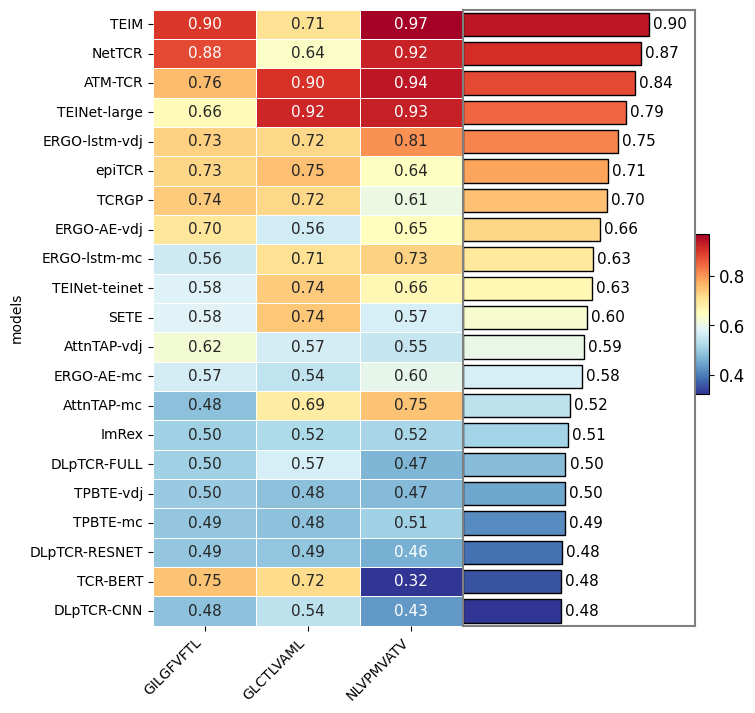

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_Diseaseslstm_mcpas_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_Diseaseslstm_vdj_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_Diseasesae_mcpas_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_Diseasesae_vdj_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    NetTCR=pd.read_csv("./NetTCR/result/Original/seen/three/"+i+"_Diseasesall_result.csv")
    NetTCR['epitope'] = NetTCR['epitope'] + '-NetTCR'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/seen/three/"+i+"_Diseases_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/seen/three/"+i+"_Diseases_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/seen/three/"+i+"_Diseases_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/seen/three/"+i+"_Diseases_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/seen/three/"+i+"_Diseases_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/seen/three/"+i+"_Diseasesall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/seen/three/large_"+i+"_Diseasesall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/seen/three/teinet_"+i+"_Diseasesall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/seen/three/"+i+"_Diseasesall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    SETE=pd.read_csv("./SETE/result/Original/seen/three/"+i+"_Diseasesall_result.csv")
    SETE['epitope']=SETE['epitope'] + '-SETE'
    TEIM=pd.read_csv("./TEIM/result/Original/seen/three/"+i+"_Diseasesall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/seen/three/McPAS_"+i+"_Diseasesall_result.csv")
    TPBTE_mc['epitope'] = TPBTE_mc['epitope'] + '-TPBTE_mc'
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/seen/three/VDJdb_"+i+"_Diseasesall_result.csv")
    TPBTE_vdj['epitope'] = TPBTE_vdj['epitope'] + '-TPBTE_vdj'
    TCRGP=pd.read_csv("./TCRGP/result/Original/seen/three/"+i+"_Diseasesall_result.csv")
    TCRGP['epitope'] = TCRGP['epitope'] + '-TCRGP'
    ImRex=pd.read_csv("./ImRex/result/Original/seen/three/"+i+"_Diseasesall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    tcr_bert=pd.read_csv("./tcr_bert/result/Original/seen/three/"+i+"_Diseasesall_result.csv")
    tcr_bert['epitope'] = tcr_bert['epitope'] + '-TCR_BERT'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','SETE','TEIM','TPBTE_mc','TPBTE_vdj','TCRGP','ImRex','tcr_bert']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std'
]

all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values.to_csv("./All_results/data/data1/s1C_Original_Patient_Three_Epitope.csv")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec

epi_df = df_mean[~df_mean.index.str.contains('all_values')]
epi_df = epi_df[['AUPRC']]
epi_df['epi'] = epi_df.index
epi_df['epi'] = epi_df['epi'].astype(str)
try:
    new_columns = epi_df['epi'].str.split('-', n=1, expand=True)
    epi_df['epitope'] = new_columns[0]
    epi_df['models'] = new_columns[1]
except Exception as e:
    print("Error:", e)

epi_df = epi_df[['models', 'epitope', 'AUPRC']]
epi_df.reset_index(drop=True, inplace=True)
pivot_df = epi_df.pivot_table(index='models', columns='epitope', values='AUPRC', aggfunc='mean').reset_index()
pivot_df.fillna(0, inplace=True)  # 填充缺失值
models_list = pivot_df['models'].tolist()
final_data = {
    'models': models_list,
    'GILGFVFTL': pivot_df['GILGFVFTL'].tolist(),
    'GLCTLVAML': pivot_df['GLCTLVAML'].tolist(),
    'NLVPMVATV': pivot_df['NLVPMVATV'].tolist()
}

final_df = pd.DataFrame(final_data)
final_df['models'] = final_df['models'].str.replace('_', '-')
final_df.index = final_df['models']
final_df = final_df[['GILGFVFTL', 'GLCTLVAML', 'NLVPMVATV']]
all_values = all_values.sort_values(by='AUPRC', ascending=False)
epi_df = final_df.reindex(all_values.index)
all_values = all_values.sort_values(by='AUPRC')

colors = sns.color_palette("RdYlBu", n_colors=256)[::-1]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
fig = plt.figure(figsize=(7, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1.5], wspace=0.0) 
ax1 = fig.add_subplot(gs[0])
sns.heatmap(epi_df, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, cbar=False, ax=ax1, annot_kws={'size': 11})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
cbar_ax = fig.add_axes([0.9, 0.4, 0.02, 0.2])
cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
ax2 = fig.add_subplot(gs[1])
colors = [cmap(i / len(all_values)) for i in range(len(all_values))]
bars = ax2.barh(all_values.index, all_values['AUPRC'], color=colors, edgecolor='black')
for bar in bars:
    ax2.annotate(f'{bar.get_width():.2f}', 
                 (bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=11)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
for spine in ax2.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1.5)
ax2.set_ylim(-0.5, len(all_values) - 0.5)
ax2.set_xlim(0, 1.13)
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'C_heatmap_and_barchart_prediction_three_patient.pdf', bbox_inches='tight')
plt.show()


# D

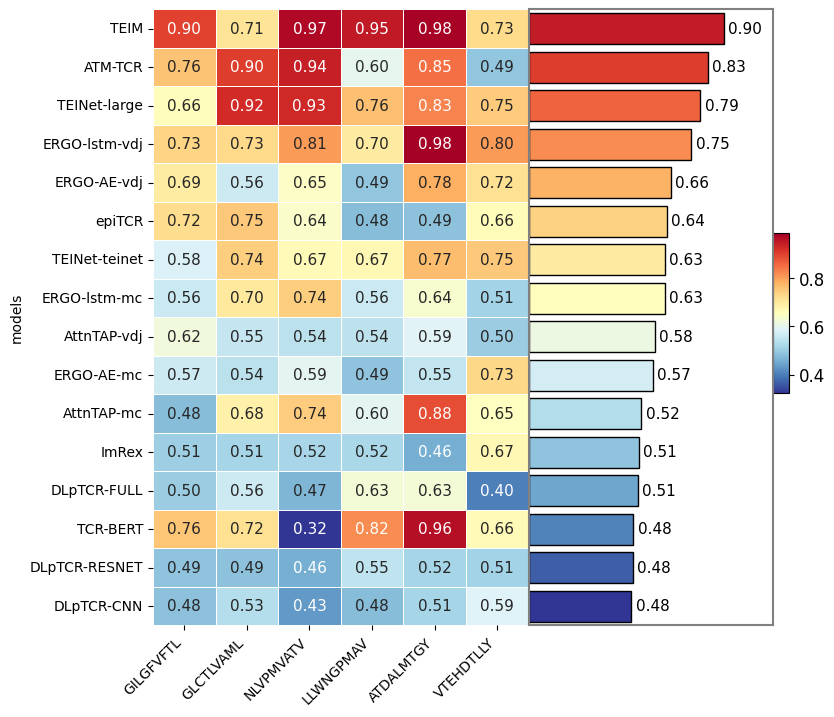

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_Diseaseslstm_mcpas_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_Diseaseslstm_vdj_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_Diseasesae_mcpas_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_Diseasesae_vdj_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/seen/seven/"+i+"_Diseases_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/seen/seven/"+i+"_Diseases_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/seen/seven/"+i+"_Diseases_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/seen/seven/"+i+"_Diseases_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/seen/seven/"+i+"_Diseases_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/seen/seven/"+i+"_Diseasesall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/seen/seven/large_"+i+"_Diseasesall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/seen/seven/teinet_"+i+"_Diseasesall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/seen/seven/"+i+"_Diseasesall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    TEIM=pd.read_csv("./TEIM/result/Original/seen/seven/"+i+"_Diseasesall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    ImRex=pd.read_csv("./ImRex/result/Original/seen/seven/"+i+"_Diseasesall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    tcr_bert=pd.read_csv("./tcr_bert/result/Original/seen/seven/"+i+"_Diseasesall_result.csv")
    tcr_bert['epitope'] = tcr_bert['epitope'] + '-TCR_BERT'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','TEIM','ImRex','tcr_bert']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std'
]

all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values.to_csv("./All_results/data/data1/s1D_Original_patient_six_Epitope.csv")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
colors = sns.color_palette("RdYlBu", n_colors=256)[::-1]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

epi_df = df_mean[~df_mean.index.str.contains('all_values')]
epi_df = epi_df[['AUPRC']]
epi_df['epi'] = epi_df.index
epi_df['epi'] = epi_df['epi'].astype(str)
try:
    new_columns = epi_df['epi'].str.split('-', n=1, expand=True)
    epi_df['epitope'] = new_columns[0]
    epi_df['models'] = new_columns[1]
except Exception as e:
    print("Error:", e)

epi_df = epi_df[['models', 'epitope', 'AUPRC']]
epi_df.reset_index(drop=True, inplace=True)
pivot_df = epi_df.pivot_table(index='models', columns='epitope', values='AUPRC', aggfunc='mean').reset_index()
pivot_df.fillna(0, inplace=True)  # 填充缺失值
models_list = pivot_df['models'].tolist()
final_data = {
    'models': models_list,
    'GILGFVFTL': pivot_df['GILGFVFTL'].tolist(),
    'GLCTLVAML': pivot_df['GLCTLVAML'].tolist(),
    'NLVPMVATV': pivot_df['NLVPMVATV'].tolist(),
    'LLWNGPMAV': pivot_df['LLWNGPMAV'].tolist(),
    'ATDALMTGY': pivot_df['ATDALMTGY'].tolist(),
    'VTEHDTLLY': pivot_df['VTEHDTLLY'].tolist()}

final_df = pd.DataFrame(final_data)
final_df['models'] = final_df['models'].str.replace('_', '-')
final_df.index = final_df['models']
final_df = final_df[['GILGFVFTL', 'GLCTLVAML', 'NLVPMVATV','LLWNGPMAV','ATDALMTGY','VTEHDTLLY']]
all_values = all_values.sort_values(by='AUPRC', ascending=False)
epi_df = final_df.reindex(all_values.index)
all_values = all_values.sort_values(by='AUPRC')

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1.3], wspace=0.0) 
ax1 = fig.add_subplot(gs[0])
sns.heatmap(epi_df, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, cbar=False, ax=ax1, annot_kws={'size': 11})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
cbar_ax = fig.add_axes([0.9, 0.4, 0.02, 0.2])
cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
ax2 = fig.add_subplot(gs[1])
colors = [cmap(i / len(all_values)) for i in range(len(all_values))]
bars = ax2.barh(all_values.index, all_values['AUPRC'], color=colors, edgecolor='black')
for bar in bars:
    ax2.annotate(f'{bar.get_width():.2f}', 
                 (bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=11)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
for spine in ax2.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1.5)
ax2.set_ylim(-0.5, len(all_values) - 0.5)
ax2.set_xlim(0, 1.13)
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'D_heatmap_and_barchart_prediction_six_patient.pdf', bbox_inches='tight')
plt.show()



# E

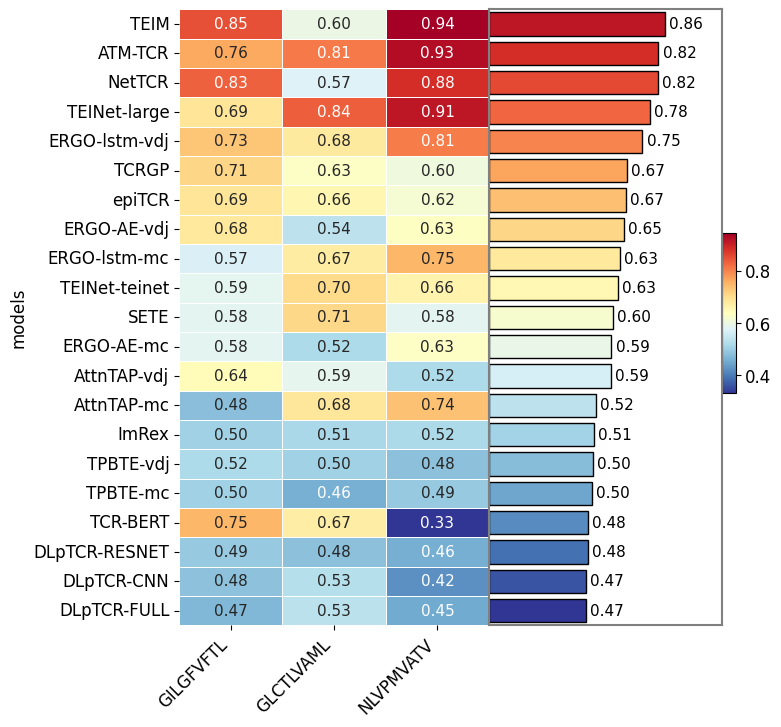

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_antigen_specificitylstm_mcpas_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_antigen_specificitylstm_vdj_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_antigen_specificityae_mcpas_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_antigen_specificityae_vdj_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    NetTCR=pd.read_csv("./NetTCR/result/Original/seen/three/"+i+"_antigen_specificityall_result.csv")
    NetTCR['epitope'] = NetTCR['epitope'] + '-NetTCR'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/seen/three/"+i+"_antigen_specificity_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/seen/three/"+i+"_antigen_specificity_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/seen/three/"+i+"_antigen_specificity_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/seen/three/"+i+"_antigen_specificity_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/seen/three/"+i+"_antigen_specificity_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/seen/three/"+i+"_antigen_specificityall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/seen/three/large_"+i+"_antigen_specificityall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/seen/three/teinet_"+i+"_antigen_specificityall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/seen/three/"+i+"_antigen_specificityall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    SETE=pd.read_csv("./SETE/result/Original/seen/three/"+i+"_antigen_specificityall_result.csv")
    SETE['epitope']=SETE['epitope'] + '-SETE'
    TEIM=pd.read_csv("./TEIM/result/Original/seen/three/"+i+"_antigen_specificityall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/seen/three/McPAS_"+i+"_antigen_specificityall_result.csv")
    TPBTE_mc['epitope'] = TPBTE_mc['epitope'] + '-TPBTE_mc'
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/seen/three/VDJdb_"+i+"_antigen_specificityall_result.csv")
    TPBTE_vdj['epitope'] = TPBTE_vdj['epitope'] + '-TPBTE_vdj'
    TCRGP=pd.read_csv("./TCRGP/result/Original/seen/three/"+i+"_antigen_specificityall_result.csv")
    TCRGP['epitope'] = TCRGP['epitope'] + '-TCRGP'
    ImRex=pd.read_csv("./ImRex/result/Original/seen/three/"+i+"_antigen_specificityall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    tcr_bert=pd.read_csv("./tcr_bert/result/Original/seen/three/"+i+"_antigen_specificityall_result.csv")
    tcr_bert['epitope'] = tcr_bert['epitope'] + '-TCR_BERT'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','SETE','TEIM','TPBTE_mc','TPBTE_vdj','TCRGP','ImRex','tcr_bert']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std'
]

all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values.to_csv("./All_results/data/data1/s1E_Original_antigen_specificity_Three_Epitope.csv")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec

epi_df = df_mean[~df_mean.index.str.contains('all_values')]
epi_df = epi_df[['AUPRC']]
epi_df['epi'] = epi_df.index
epi_df['epi'] = epi_df['epi'].astype(str)
try:
    new_columns = epi_df['epi'].str.split('-', n=1, expand=True)
    epi_df['epitope'] = new_columns[0]
    epi_df['models'] = new_columns[1]
except Exception as e:
    print("Error:", e)

epi_df = epi_df[['models', 'epitope', 'AUPRC']]
epi_df.reset_index(drop=True, inplace=True)
pivot_df = epi_df.pivot_table(index='models', columns='epitope', values='AUPRC', aggfunc='mean').reset_index()
pivot_df.fillna(0, inplace=True)  # 填充缺失值
models_list = pivot_df['models'].tolist()
final_data = {
    'models': models_list,
    'GILGFVFTL': pivot_df['GILGFVFTL'].tolist(),
    'GLCTLVAML': pivot_df['GLCTLVAML'].tolist(),
    'NLVPMVATV': pivot_df['NLVPMVATV'].tolist()
}

final_df = pd.DataFrame(final_data)
final_df['models'] = final_df['models'].str.replace('_', '-')
final_df.index = final_df['models']
final_df = final_df[['GILGFVFTL', 'GLCTLVAML', 'NLVPMVATV']]
all_values = all_values.sort_values(by='AUPRC', ascending=False)
epi_df = final_df.reindex(all_values.index)
all_values = all_values.sort_values(by='AUPRC')

colors = sns.color_palette("RdYlBu", n_colors=256)[::-1]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
fig = plt.figure(figsize=(7, 8))
plt.rcParams['pdf.fonttype'] = 42
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1.5], wspace=0.0) 
ax1 = fig.add_subplot(gs[0])
sns.heatmap(epi_df, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, cbar=False, ax=ax1, annot_kws={'size': 11})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
cbar_ax = fig.add_axes([0.9, 0.4, 0.02, 0.2])
cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
ax2 = fig.add_subplot(gs[1])
colors = [cmap(i / len(all_values)) for i in range(len(all_values))]
bars = ax2.barh(all_values.index, all_values['AUPRC'], color=colors, edgecolor='black')
for bar in bars:
    ax2.annotate(f'{bar.get_width():.2f}', 
                 (bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=11)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
for spine in ax2.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1.5)
ax2.set_ylim(-0.5, len(all_values) - 0.5)
ax2.set_xlim(0, 1.13)
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'E_heatmap_and_barchart_prediction_three_antigen_specificity.pdf', bbox_inches='tight')
plt.show()


# F

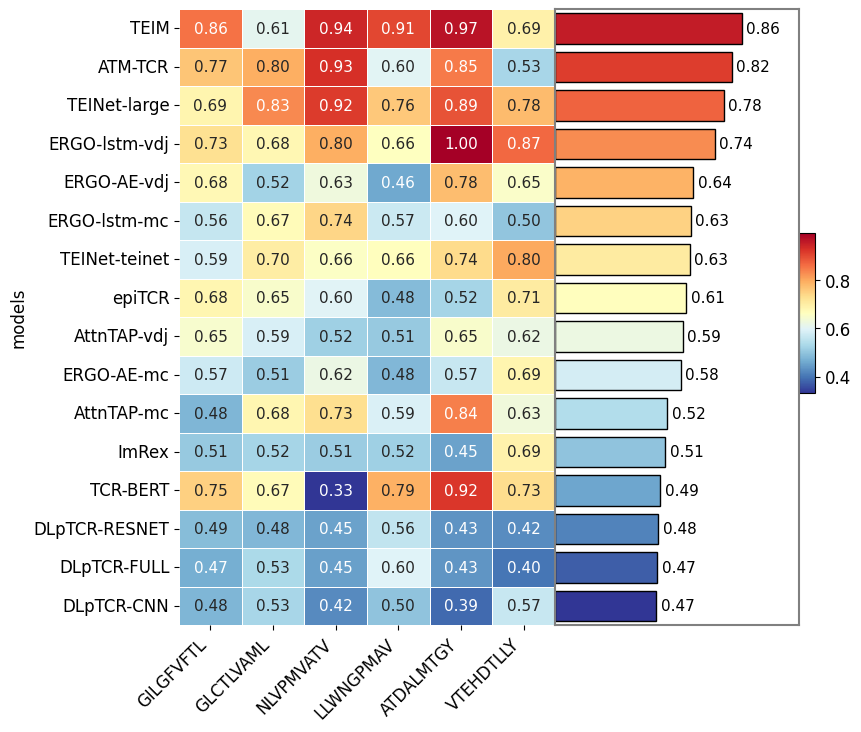

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_antigen_specificitylstm_mcpas_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_antigen_specificitylstm_vdj_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_antigen_specificityae_mcpas_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_antigen_specificityae_vdj_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/seen/seven/"+i+"_antigen_specificity_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/seen/seven/"+i+"_antigen_specificity_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/seen/seven/"+i+"_antigen_specificity_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/seen/seven/"+i+"_antigen_specificity_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/seen/seven/"+i+"_antigen_specificity_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/seen/seven/"+i+"_antigen_specificityall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/seen/seven/large_"+i+"_antigen_specificityall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/seen/seven/teinet_"+i+"_antigen_specificityall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/seen/seven/"+i+"_antigen_specificityall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    TEIM=pd.read_csv("./TEIM/result/Original/seen/seven/"+i+"_antigen_specificityall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    ImRex=pd.read_csv("./ImRex/result/Original/seen/seven/"+i+"_antigen_specificityall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    tcr_bert=pd.read_csv("./tcr_bert/result/Original/seen/seven/"+i+"_antigen_specificityall_result.csv")
    tcr_bert['epitope'] = tcr_bert['epitope'] + '-TCR_BERT'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','TEIM','ImRex','tcr_bert']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std'
]

all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values.to_csv("./All_results/data/data1/s1F_Original_antigen_specificity_six_Epitope.csv")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
colors = sns.color_palette("RdYlBu", n_colors=256)[::-1]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

epi_df = df_mean[~df_mean.index.str.contains('all_values')]
epi_df = epi_df[['AUPRC']]
epi_df['epi'] = epi_df.index
epi_df['epi'] = epi_df['epi'].astype(str)
try:
    new_columns = epi_df['epi'].str.split('-', n=1, expand=True)
    epi_df['epitope'] = new_columns[0]
    epi_df['models'] = new_columns[1]
except Exception as e:
    print("Error:", e)

epi_df = epi_df[['models', 'epitope', 'AUPRC']]
epi_df.reset_index(drop=True, inplace=True)
pivot_df = epi_df.pivot_table(index='models', columns='epitope', values='AUPRC', aggfunc='mean').reset_index()
pivot_df.fillna(0, inplace=True)  # 填充缺失值
models_list = pivot_df['models'].tolist()
final_data = {
    'models': models_list,
    'GILGFVFTL': pivot_df['GILGFVFTL'].tolist(),
    'GLCTLVAML': pivot_df['GLCTLVAML'].tolist(),
    'NLVPMVATV': pivot_df['NLVPMVATV'].tolist(),
    'LLWNGPMAV': pivot_df['LLWNGPMAV'].tolist(),
    'ATDALMTGY': pivot_df['ATDALMTGY'].tolist(),
    'VTEHDTLLY': pivot_df['VTEHDTLLY'].tolist()}

final_df = pd.DataFrame(final_data)
final_df['models'] = final_df['models'].str.replace('_', '-')
final_df.index = final_df['models']
final_df = final_df[['GILGFVFTL', 'GLCTLVAML', 'NLVPMVATV','LLWNGPMAV','ATDALMTGY','VTEHDTLLY']]
all_values = all_values.sort_values(by='AUPRC', ascending=False)
epi_df = final_df.reindex(all_values.index)
all_values = all_values.sort_values(by='AUPRC')

fig = plt.figure(figsize=(8, 8))
plt.rcParams['pdf.fonttype'] = 42
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1.3], wspace=0.0) 
ax1 = fig.add_subplot(gs[0])
sns.heatmap(epi_df, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, cbar=False, ax=ax1, annot_kws={'size': 11})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
cbar_ax = fig.add_axes([0.9, 0.4, 0.02, 0.2])
cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
ax2 = fig.add_subplot(gs[1])
colors = [cmap(i / len(all_values)) for i in range(len(all_values))]
bars = ax2.barh(all_values.index, all_values['AUPRC'], color=colors, edgecolor='black')
for bar in bars:
    ax2.annotate(f'{bar.get_width():.2f}', 
                 (bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=11)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
for spine in ax2.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1.5)
ax2.set_ylim(-0.5, len(all_values) - 0.5)
ax2.set_xlim(0, 1.13)
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'F_heatmap_and_barchart_prediction_six_antigen_specificity.pdf', bbox_inches='tight')
plt.show()

# G

/tmp/ipykernel_25494/807684756.py:313: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_25494/807684756.py:313: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  bar_plot = sns.barplot(


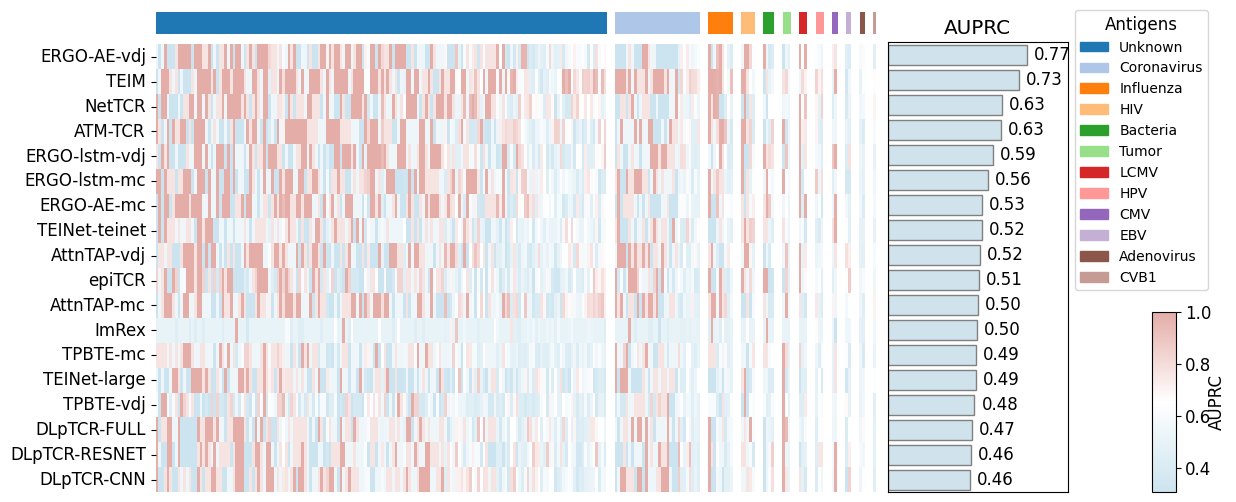

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/unseen/lstm_mcpas"+i+"_Diseases_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/unseen/lstm_vdj"+i+"_Diseases_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/unseen/ae_mcpas"+i+"_Diseases_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/unseen/ae_vdj"+i+"_Diseases_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    NetTCR=pd.read_csv("./NetTCR/result/Original/unseen/"+i+"_Diseasesall_result.csv")
    NetTCR['epitope'] = NetTCR['epitope'] + '-NetTCR'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_Diseases_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_Diseases_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_Diseases_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_Diseases_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_Diseases_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/unseen/"+i+"_Diseasesall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/unseen/large_"+i+"_Diseasesall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/unseen/teinet_"+i+"_Diseasesall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/unseen/"+i+"_Diseasesall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    TEIM=pd.read_csv("./TEIM/result/Original/unseen/"+i+"_Diseasesall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/unseen/McPAS_"+i+"_Diseasesall_result.csv")
    TPBTE_mc['epitope'] = TPBTE_mc['epitope'] + '-TPBTE_mc'
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/unseen/VDJdb_"+i+"_Diseasesall_result.csv")
    TPBTE_vdj['epitope'] = TPBTE_vdj['epitope'] + '-TPBTE_vdj'
    ImRex=pd.read_csv("./ImRex/result/Original/unseen/"+i+"_Diseasesall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','TEIM','TPBTE_mc','TPBTE_vdj','ImRex']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std']
all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values = all_values.sort_values(by='AUPRC', ascending=False)
all_values.to_csv("./All_results/data/data1/1sG_Original_Diseases_unseen_Epitope.csv")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.chdir("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/")

name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/unseen/lstm_mcpas"+i+"_Diseases_all_result.csv")
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/unseen/lstm_vdj"+i+"_Diseases_all_result.csv")
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/unseen/ae_mcpas"+i+"_Diseases_all_result.csv")
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/unseen/ae_vdj"+i+"_Diseases_all_result.csv")
    NetTCR=pd.read_csv("./NetTCR/result/Original/unseen/"+i+"_Diseasesall_result.csv")
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_Diseases_CNN_all_result.csv")
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_Diseases_FULL_all_result.csv")
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_Diseases_RESNET_all_result.csv")
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_Diseases_mcpas_all_result.csv")
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_Diseases_vdjdb_all_result.csv")
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/unseen/"+i+"_Diseasesall_result.csv")
    TEINet_large=pd.read_csv("./TEINet/result/Original/unseen/large_"+i+"_Diseasesall_result.csv")
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/unseen/teinet_"+i+"_Diseasesall_result.csv")
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/unseen/"+i+"_Diseasesall_result.csv")
    TEIM=pd.read_csv("./TEIM/result/Original/unseen/"+i+"_Diseasesall_result.csv")
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/unseen/McPAS_"+i+"_Diseasesall_result.csv")
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/unseen/VDJdb_"+i+"_Diseasesall_result.csv")
    ImRex=pd.read_csv("./ImRex/result/Original/unseen/"+i+"_Diseasesall_result.csv")
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL','ImRex',
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 'TEINet_large','TEINet_teinet','epiTCR','TEIM',
                       'TPBTE_mc','TPBTE_vdj']
    for df_name in dataframe_names:
        df = globals()[df_name]
        last_row = df.tail(1)
        merged = pd.concat([merged, last_row])
    merged.set_index(pd.Index(dataframe_names), inplace=True)
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1=merged1[['roc_auc','prc_auc']]
merged2=merged2[['roc_auc','prc_auc']]
merged3=merged3[['roc_auc','prc_auc']]
df_mean = (merged1 + merged2 + merged3) / 3
df_mean = df_mean.rename(columns={'roc_auc': 'AUROC', 'prc_auc': 'AUPRC'})
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
df_std = df_std.rename(columns={'roc_auc': 'Std_AUROC', 'prc_auc': 'Std_AUPRC'})
df_mean = pd.concat([df_mean, df_std], axis=1)
df_mean = df_mean.sort_values(by='AUPRC', ascending=False)
df_mean=df_mean[['AUPRC']]
df_mean.rename(index=lambda x: x.replace('_', '-'), inplace=True)
import pandas as pd

name = ['1', '2', '3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc = pd.read_csv(f"./ERGO/result/Original/unseen/lstm_mcpas{i}_Diseases_all_result.csv")
    ERGO_lstm_vdj = pd.read_csv(f"./ERGO/result/Original/unseen/lstm_vdj{i}_Diseases_all_result.csv")
    ERGO_AE_mc = pd.read_csv(f"./ERGO/result/Original/unseen/ae_mcpas{i}_Diseases_all_result.csv")
    ERGO_AE_vdj = pd.read_csv(f"./ERGO/result/Original/unseen/ae_vdj{i}_Diseases_all_result.csv")
    NetTCR = pd.read_csv(f"./NetTCR/result/Original/unseen/{i}_Diseasesall_result.csv")
    DLpTCR_CNN = pd.read_csv(f"./DLpTCR/result/Original/unseen/{i}_Diseases_CNN_all_result.csv")
    DLpTCR_FULL = pd.read_csv(f"./DLpTCR/result/Original/unseen/{i}_Diseases_FULL_all_result.csv")
    DLpTCR_RESNET = pd.read_csv(f"./DLpTCR/result/Original/unseen/{i}_Diseases_RESNET_all_result.csv")
    AttnTAP_mc = pd.read_csv(f"./AttnTAP/result/Original/unseen/{i}_Diseases_mcpas_all_result.csv")
    AttnTAP_vdj = pd.read_csv(f"./AttnTAP/result/Original/unseen/{i}_Diseases_vdjdb_all_result.csv")
    ATM_TCR = pd.read_csv(f"./ATM_TCR/result/Original/unseen/{i}_Diseasesall_result.csv")
    TEINet_large = pd.read_csv(f"./TEINet/result/Original/unseen/large_{i}_Diseasesall_result.csv")
    TEINet_teinet = pd.read_csv(f"./TEINet/result/Original/unseen/teinet_{i}_Diseasesall_result.csv")
    epiTCR = pd.read_csv(f"./epiTCR/result/Original/no_CF/unseen/{i}_Diseasesall_result.csv")
    TEIM = pd.read_csv(f"./TEIM/result/Original/unseen/{i}_Diseasesall_result.csv")
    TPBTE_mc = pd.read_csv(f"./TPBTE/result/Original/unseen/McPAS_{i}_Diseasesall_result.csv")
    TPBTE_vdj = pd.read_csv(f"./TPBTE/result/Original/unseen/VDJdb_{i}_Diseasesall_result.csv")
    ImRex = pd.read_csv(f"./ImRex/result/Original/unseen/{i}_Diseasesall_result.csv")
    dataframes = {'ERGO_lstm_mc': ERGO_lstm_mc,
        'ERGO_lstm_vdj': ERGO_lstm_vdj,
        'ERGO_AE_mc': ERGO_AE_mc,
        'ERGO_AE_vdj': ERGO_AE_vdj,
        'NetTCR': NetTCR,
        'DLpTCR_CNN': DLpTCR_CNN,
        'DLpTCR_FULL': DLpTCR_FULL,
        'DLpTCR_RESNET': DLpTCR_RESNET,
        'AttnTAP_mc': AttnTAP_mc,
        'AttnTAP_vdj': AttnTAP_vdj,
        'ATM_TCR': ATM_TCR,
        'TEINet_large': TEINet_large,
        'TEINet_teinet': TEINet_teinet,
        'epiTCR': epiTCR,
        'TEIM': TEIM,
        'TPBTE_mc': TPBTE_mc,
        'TPBTE_vdj': TPBTE_vdj,
        'ImRex': ImRex}

    for model_name, df in dataframes.items():
        if model_name in merged_dict:
            merged_dict[model_name] = pd.concat([merged_dict[model_name], df])
        else:
            merged_dict[model_name] = df
final_dataframes = {}
for model_name, df in merged_dict.items():
    avg_df = df.groupby('epitope').mean().reset_index()
    avg_df = avg_df.drop(avg_df.index[-1])
    avg_df = avg_df[['epitope', 'prc_auc']]
    avg_df = avg_df.rename(columns={'prc_auc': model_name})
    final_dataframes[model_name] = avg_df
merged_df = None
for model_name, df in final_dataframes.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='epitope', how='outer')
merged_df = merged_df.set_index('epitope')
merged_df=merged_df.T
merged_df.rename(index=lambda x: x.replace('_', '-'), inplace=True)
merged_df=merged_df.reindex(df_mean.index)

data=pd.read_csv("./Prediction/all/unseen/all_pos.csv")
data=data[['Epitope','antigen_species']]
replace_dict = {
    'InfluenzaA': 'Influenza',
    'InfluenzaB': 'Influenza',
    'SARS-CoV2': 'Coronavirus',
    'Coronavirus': 'Coronavirus',
    'SARS-CoV1': 'Coronavirus',
    'Melanoma': 'Tumor',
    'Lung cancer': 'Tumor',
    'Glioblastoma': 'Tumor',
    'C. trachomatis': 'Bacteria',
    'S.Typhi': 'Bacteria',
    'M.tuberculosis': 'Bacteria',
    'A.cryptum': 'Bacteria'
}

data['antigen_species'] = data['antigen_species'].replace(replace_dict)
data = data.rename(columns={'Epitope': 'epitope'})
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec
from scipy.cluster.hierarchy import linkage, leaves_list


epitope_counts = data.groupby('antigen_species')['epitope'].nunique()
antigen_unique = data.drop_duplicates(subset=['epitope', 'antigen_species'])
data['antigen_species'].value_counts()
merged_with_species = pd.merge(merged_df.T, antigen_unique, on='epitope').set_index('epitope').T
new_columns = merged_with_species.iloc[-1]
merged_with_species = merged_with_species.iloc[:-1, :]
merged_with_species.columns = new_columns
column_counts = merged_with_species.columns.value_counts()
sorted_columns = column_counts.index.tolist()
sorted_df = pd.DataFrame()
for col in sorted_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    sorted_df = pd.concat([sorted_df, cols_to_group], axis=1)
merged_with_species=sorted_df
merged_with_species


column_counts = merged_with_species.columns.value_counts()
sorted_columns = column_counts.index.tolist()
sorted_df = pd.DataFrame()

for col in sorted_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    sorted_df = pd.concat([sorted_df, cols_to_group], axis=1)

merged_with_species = sorted_df
unique_columns = merged_with_species.columns.unique()
df_rearranged = pd.DataFrame()

for col in unique_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    if cols_to_group.dropna(axis=1, how='all').shape[1] > 1:
        linkage_matrix = linkage(cols_to_group.T.dropna(), method='single')
        order = leaves_list(linkage_matrix)
        clustered_cols = cols_to_group.iloc[:, order]
    else:
        clustered_cols = cols_to_group

    df_rearranged = pd.concat([df_rearranged, clustered_cols], axis=1)
    num_gaps = 3
    for _ in range(num_gaps):
        df_rearranged = pd.concat([df_rearranged, pd.DataFrame(np.nan, index=cols_to_group.index, columns=[f'gap_{col}'])], axis=1)

df_rearranged = df_rearranged.iloc[:, :-num_gaps]

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 12})
color_palette = sns.color_palette("tab20", len(unique_columns))
col_colors = []

for col in df_rearranged.columns:
    if not col.startswith('gap'):
        col_colors.append(color_palette[list(unique_columns).index(col)])
    else:
        col_colors.append((1.0, 1.0, 1.0)) 

fig = plt.figure(figsize=(12, 6)) 
ax_heatmap = fig.add_axes([0.1, 0.1, 0.6, 0.8]) 
colors = ["#CCE4EF", "white", "#E5ADA8"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
sns.heatmap(
    df_rearranged.astype(float), 
    cmap=cmap, 
    cbar=False, 
    ax=ax_heatmap, 
    xticklabels=False)

divider = make_axes_locatable(ax_heatmap)
cax_above = divider.append_axes("top", size="5%", pad=0.1) 
cax = fig.add_axes([0.93, 0.1, 0.02, 0.3])  # 

colorbar = fig.colorbar(ax_heatmap.collections[0], cax=cax, orientation='vertical')
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')
cax.set_ylabel('AUPRC', va='center') 
cax_above.imshow([col_colors], aspect='auto', interpolation='nearest')
cax_above.axis('off')

handles = [Patch(color=color_palette[i], label=unique_columns[i]) for i in range(len(unique_columns))]
plt.legend(
    handles=handles, 
    loc='center left', 
    bbox_to_anchor=(-3.2, 1.9), 
    borderaxespad=0., fontsize=10, labelspacing=0.5, ncol=1, title="Antigens")

ax_barplot = fig.add_axes([0.71, 0.1, 0.15, 0.75])  
bar_plot = sns.barplot(
    x='AUPRC', y=df_mean.index, data=df_mean, 
    palette=["#CCE4EF"], edgecolor='gray', ax=ax_barplot
)
ax_barplot.set_title('AUPRC')
ax_barplot.set_ylabel('')
ax_barplot.set_yticklabels([])
ax_barplot.tick_params(axis='y', which='both', length=0)
ax_barplot.set_xlim(0, 1)
ax_barplot.get_xaxis().set_visible(False)

for p in bar_plot.patches:
    ax_barplot.annotate(
        f"{p.get_width():.2f}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        textcoords="offset points",  
        xytext=(5, 0), ha='left', va='center')

path = "./All_results/fig/fig1s/"
plt.savefig(path + 'G_unseen_prediction.pdf', bbox_inches='tight')
plt.show()


# H  0827

/tmp/ipykernel_25494/1302273232.py:313: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_25494/1302273232.py:313: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  bar_plot = sns.barplot(


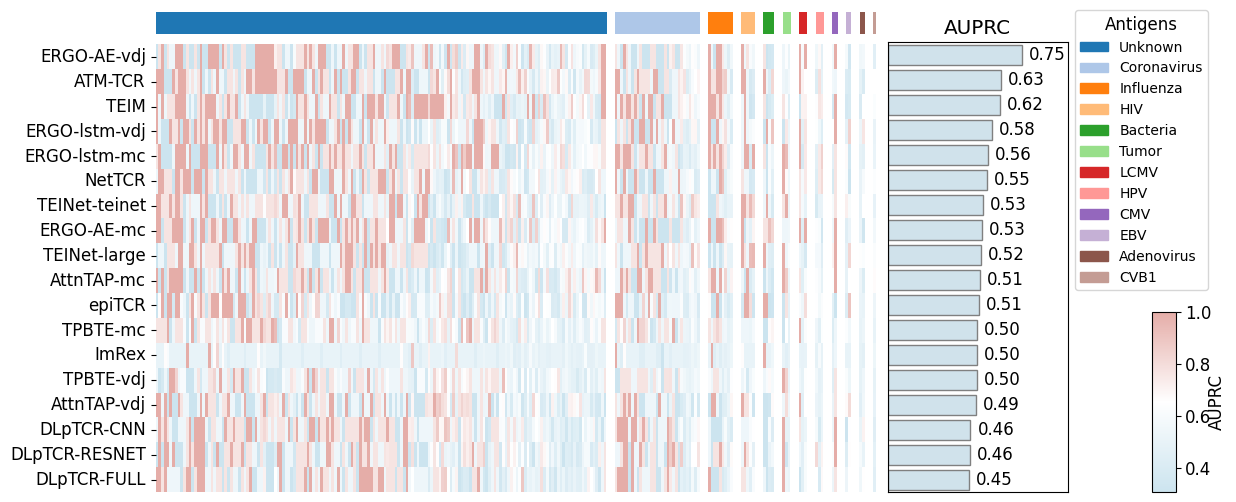

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/unseen/lstm_mcpas"+i+"_antigen_specificity_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/unseen/lstm_vdj"+i+"_antigen_specificity_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/unseen/ae_mcpas"+i+"_antigen_specificity_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/unseen/ae_vdj"+i+"_antigen_specificity_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    NetTCR=pd.read_csv("./NetTCR/result/Original/unseen/"+i+"_antigen_specificityall_result.csv")
    NetTCR['epitope'] = NetTCR['epitope'] + '-NetTCR'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_antigen_specificity_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_antigen_specificity_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_antigen_specificity_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_antigen_specificity_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_antigen_specificity_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/unseen/"+i+"_antigen_specificityall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/unseen/large_"+i+"_antigen_specificityall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/unseen/teinet_"+i+"_antigen_specificityall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/unseen/"+i+"_antigen_specificityall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    TEIM=pd.read_csv("./TEIM/result/Original/unseen/"+i+"_antigen_specificityall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/unseen/McPAS_"+i+"_antigen_specificityall_result.csv")
    TPBTE_mc['epitope'] = TPBTE_mc['epitope'] + '-TPBTE_mc'
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/unseen/VDJdb_"+i+"_antigen_specificityall_result.csv")
    TPBTE_vdj['epitope'] = TPBTE_vdj['epitope'] + '-TPBTE_vdj'
    ImRex=pd.read_csv("./ImRex/result/Original/unseen/"+i+"_antigen_specificityall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','TEIM','TPBTE_mc','TPBTE_vdj','ImRex']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std']
all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values = all_values.sort_values(by='AUPRC', ascending=False)
all_values.to_csv("./All_results/data/data1/1sH_Original_antigen_specificity_unseen_Epitope.csv")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.chdir("/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/")

name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/unseen/lstm_mcpas"+i+"_antigen_specificity_all_result.csv")
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/unseen/lstm_vdj"+i+"_antigen_specificity_all_result.csv")
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/unseen/ae_mcpas"+i+"_antigen_specificity_all_result.csv")
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/unseen/ae_vdj"+i+"_antigen_specificity_all_result.csv")
    NetTCR=pd.read_csv("./NetTCR/result/Original/unseen/"+i+"_antigen_specificityall_result.csv")
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_antigen_specificity_CNN_all_result.csv")
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_antigen_specificity_FULL_all_result.csv")
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_antigen_specificity_RESNET_all_result.csv")
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_antigen_specificity_mcpas_all_result.csv")
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_antigen_specificity_vdjdb_all_result.csv")
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/unseen/"+i+"_antigen_specificityall_result.csv")
    TEINet_large=pd.read_csv("./TEINet/result/Original/unseen/large_"+i+"_antigen_specificityall_result.csv")
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/unseen/teinet_"+i+"_antigen_specificityall_result.csv")
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/unseen/"+i+"_antigen_specificityall_result.csv")
    TEIM=pd.read_csv("./TEIM/result/Original/unseen/"+i+"_antigen_specificityall_result.csv")
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/unseen/McPAS_"+i+"_antigen_specificityall_result.csv")
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/unseen/VDJdb_"+i+"_antigen_specificityall_result.csv")
    ImRex=pd.read_csv("./ImRex/result/Original/unseen/"+i+"_antigen_specificityall_result.csv")
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL','ImRex',
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 'TEINet_large','TEINet_teinet','epiTCR','TEIM',
                       'TPBTE_mc','TPBTE_vdj']
    for df_name in dataframe_names:
        df = globals()[df_name]
        last_row = df.tail(1)
        merged = pd.concat([merged, last_row])
    merged.set_index(pd.Index(dataframe_names), inplace=True)
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1=merged1[['roc_auc','prc_auc']]
merged2=merged2[['roc_auc','prc_auc']]
merged3=merged3[['roc_auc','prc_auc']]
df_mean = (merged1 + merged2 + merged3) / 3
df_mean = df_mean.rename(columns={'roc_auc': 'AUROC', 'prc_auc': 'AUPRC'})
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
df_std = df_std.rename(columns={'roc_auc': 'Std_AUROC', 'prc_auc': 'Std_AUPRC'})
df_mean = pd.concat([df_mean, df_std], axis=1)
df_mean = df_mean.sort_values(by='AUPRC', ascending=False)
df_mean=df_mean[['AUPRC']]
df_mean.rename(index=lambda x: x.replace('_', '-'), inplace=True)
import pandas as pd

name = ['1', '2', '3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc = pd.read_csv(f"./ERGO/result/Original/unseen/lstm_mcpas{i}_antigen_specificity_all_result.csv")
    ERGO_lstm_vdj = pd.read_csv(f"./ERGO/result/Original/unseen/lstm_vdj{i}_antigen_specificity_all_result.csv")
    ERGO_AE_mc = pd.read_csv(f"./ERGO/result/Original/unseen/ae_mcpas{i}_antigen_specificity_all_result.csv")
    ERGO_AE_vdj = pd.read_csv(f"./ERGO/result/Original/unseen/ae_vdj{i}_antigen_specificity_all_result.csv")
    NetTCR = pd.read_csv(f"./NetTCR/result/Original/unseen/{i}_antigen_specificityall_result.csv")
    DLpTCR_CNN = pd.read_csv(f"./DLpTCR/result/Original/unseen/{i}_antigen_specificity_CNN_all_result.csv")
    DLpTCR_FULL = pd.read_csv(f"./DLpTCR/result/Original/unseen/{i}_antigen_specificity_FULL_all_result.csv")
    DLpTCR_RESNET = pd.read_csv(f"./DLpTCR/result/Original/unseen/{i}_antigen_specificity_RESNET_all_result.csv")
    AttnTAP_mc = pd.read_csv(f"./AttnTAP/result/Original/unseen/{i}_antigen_specificity_mcpas_all_result.csv")
    AttnTAP_vdj = pd.read_csv(f"./AttnTAP/result/Original/unseen/{i}_antigen_specificity_vdjdb_all_result.csv")
    ATM_TCR = pd.read_csv(f"./ATM_TCR/result/Original/unseen/{i}_antigen_specificityall_result.csv")
    TEINet_large = pd.read_csv(f"./TEINet/result/Original/unseen/large_{i}_antigen_specificityall_result.csv")
    TEINet_teinet = pd.read_csv(f"./TEINet/result/Original/unseen/teinet_{i}_antigen_specificityall_result.csv")
    epiTCR = pd.read_csv(f"./epiTCR/result/Original/no_CF/unseen/{i}_antigen_specificityall_result.csv")
    TEIM = pd.read_csv(f"./TEIM/result/Original/unseen/{i}_antigen_specificityall_result.csv")
    TPBTE_mc = pd.read_csv(f"./TPBTE/result/Original/unseen/McPAS_{i}_antigen_specificityall_result.csv")
    TPBTE_vdj = pd.read_csv(f"./TPBTE/result/Original/unseen/VDJdb_{i}_antigen_specificityall_result.csv")
    ImRex = pd.read_csv(f"./ImRex/result/Original/unseen/{i}_antigen_specificityall_result.csv")
    dataframes = {'ERGO_lstm_mc': ERGO_lstm_mc,
        'ERGO_lstm_vdj': ERGO_lstm_vdj,
        'ERGO_AE_mc': ERGO_AE_mc,
        'ERGO_AE_vdj': ERGO_AE_vdj,
        'NetTCR': NetTCR,
        'DLpTCR_CNN': DLpTCR_CNN,
        'DLpTCR_FULL': DLpTCR_FULL,
        'DLpTCR_RESNET': DLpTCR_RESNET,
        'AttnTAP_mc': AttnTAP_mc,
        'AttnTAP_vdj': AttnTAP_vdj,
        'ATM_TCR': ATM_TCR,
        'TEINet_large': TEINet_large,
        'TEINet_teinet': TEINet_teinet,
        'epiTCR': epiTCR,
        'TEIM': TEIM,
        'TPBTE_mc': TPBTE_mc,
        'TPBTE_vdj': TPBTE_vdj,
        'ImRex': ImRex}

    for model_name, df in dataframes.items():
        if model_name in merged_dict:
            merged_dict[model_name] = pd.concat([merged_dict[model_name], df])
        else:
            merged_dict[model_name] = df
final_dataframes = {}
for model_name, df in merged_dict.items():
    avg_df = df.groupby('epitope').mean().reset_index()
    avg_df = avg_df.drop(avg_df.index[-1])
    avg_df = avg_df[['epitope', 'prc_auc']]
    avg_df = avg_df.rename(columns={'prc_auc': model_name})
    final_dataframes[model_name] = avg_df
merged_df = None
for model_name, df in final_dataframes.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='epitope', how='outer')
merged_df = merged_df.set_index('epitope')
merged_df=merged_df.T
merged_df.rename(index=lambda x: x.replace('_', '-'), inplace=True)
merged_df=merged_df.reindex(df_mean.index)

data=pd.read_csv("./Prediction/all/unseen/all_pos.csv")
data=data[['Epitope','antigen_species']]
replace_dict = {
    'InfluenzaA': 'Influenza',
    'InfluenzaB': 'Influenza',
    'SARS-CoV2': 'Coronavirus',
    'Coronavirus': 'Coronavirus',
    'SARS-CoV1': 'Coronavirus',
    'Melanoma': 'Tumor',
    'Lung cancer': 'Tumor',
    'Glioblastoma': 'Tumor',
    'C. trachomatis': 'Bacteria',
    'S.Typhi': 'Bacteria',
    'M.tuberculosis': 'Bacteria',
    'A.cryptum': 'Bacteria'
}

data['antigen_species'] = data['antigen_species'].replace(replace_dict)
data = data.rename(columns={'Epitope': 'epitope'})
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec
from scipy.cluster.hierarchy import linkage, leaves_list


epitope_counts = data.groupby('antigen_species')['epitope'].nunique()
antigen_unique = data.drop_duplicates(subset=['epitope', 'antigen_species'])
data['antigen_species'].value_counts()
merged_with_species = pd.merge(merged_df.T, antigen_unique, on='epitope').set_index('epitope').T
new_columns = merged_with_species.iloc[-1]
merged_with_species = merged_with_species.iloc[:-1, :]
merged_with_species.columns = new_columns
column_counts = merged_with_species.columns.value_counts()
sorted_columns = column_counts.index.tolist()
sorted_df = pd.DataFrame()
for col in sorted_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    sorted_df = pd.concat([sorted_df, cols_to_group], axis=1)
merged_with_species=sorted_df
merged_with_species


column_counts = merged_with_species.columns.value_counts()
sorted_columns = column_counts.index.tolist()
sorted_df = pd.DataFrame()

for col in sorted_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    sorted_df = pd.concat([sorted_df, cols_to_group], axis=1)

merged_with_species = sorted_df
unique_columns = merged_with_species.columns.unique()
df_rearranged = pd.DataFrame()

for col in unique_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    if cols_to_group.dropna(axis=1, how='all').shape[1] > 1:
        linkage_matrix = linkage(cols_to_group.T.dropna(), method='single')
        order = leaves_list(linkage_matrix)
        clustered_cols = cols_to_group.iloc[:, order]
    else:
        clustered_cols = cols_to_group

    df_rearranged = pd.concat([df_rearranged, clustered_cols], axis=1)
    num_gaps = 3
    for _ in range(num_gaps):
        df_rearranged = pd.concat([df_rearranged, pd.DataFrame(np.nan, index=cols_to_group.index, columns=[f'gap_{col}'])], axis=1)

df_rearranged = df_rearranged.iloc[:, :-num_gaps]

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 12})
color_palette = sns.color_palette("tab20", len(unique_columns))
col_colors = []

for col in df_rearranged.columns:
    if not col.startswith('gap'):
        col_colors.append(color_palette[list(unique_columns).index(col)])
    else:
        col_colors.append((1.0, 1.0, 1.0)) 

fig = plt.figure(figsize=(12, 6)) 
ax_heatmap = fig.add_axes([0.1, 0.1, 0.6, 0.8]) 
colors = ["#CCE4EF", "white", "#E5ADA8"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
sns.heatmap(
    df_rearranged.astype(float), 
    cmap=cmap, 
    cbar=False, 
    ax=ax_heatmap, 
    xticklabels=False)

divider = make_axes_locatable(ax_heatmap)
cax_above = divider.append_axes("top", size="5%", pad=0.1) 
cax = fig.add_axes([0.93, 0.1, 0.02, 0.3])  # 

colorbar = fig.colorbar(ax_heatmap.collections[0], cax=cax, orientation='vertical')
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')
cax.set_ylabel('AUPRC', va='center') 
cax_above.imshow([col_colors], aspect='auto', interpolation='nearest')
cax_above.axis('off')

handles = [Patch(color=color_palette[i], label=unique_columns[i]) for i in range(len(unique_columns))]
plt.legend(
    handles=handles, 
    loc='center left', 
    bbox_to_anchor=(-3.2, 1.9), 
    borderaxespad=0., fontsize=10, labelspacing=0.5, ncol=1, title="Antigens")

ax_barplot = fig.add_axes([0.71, 0.1, 0.15, 0.75])  
bar_plot = sns.barplot(
    x='AUPRC', y=df_mean.index, data=df_mean, 
    palette=["#CCE4EF"], edgecolor='gray', ax=ax_barplot
)
ax_barplot.set_title('AUPRC')
ax_barplot.set_ylabel('')
ax_barplot.set_yticklabels([])
ax_barplot.tick_params(axis='y', which='both', length=0)
ax_barplot.set_xlim(0, 1)
ax_barplot.get_xaxis().set_visible(False)
for p in bar_plot.patches:
    ax_barplot.annotate(
        f"{p.get_width():.2f}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        textcoords="offset points",  
        xytext=(5, 0), ha='left', va='center')
    
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'H_unseen_prediction_antigen_specificity.pdf', bbox_inches='tight')
plt.show()

# I

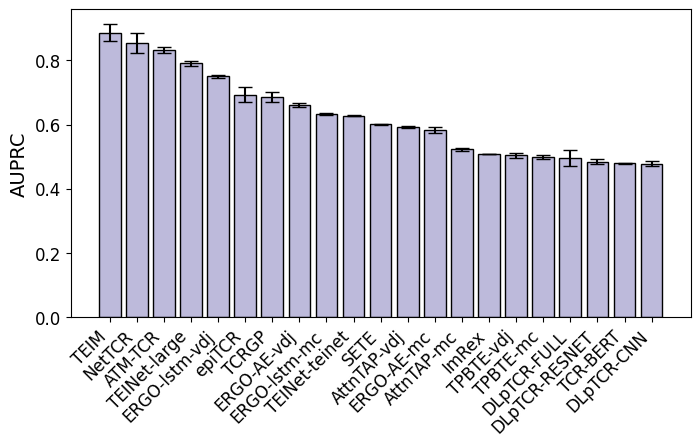

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
three_health=pd.read_csv("./All_results/data/data1/Original_Healthy_Three_Epitope.csv")
three_Patient=pd.read_csv("./All_results/data/data1/s1C_Original_Patient_Three_Epitope.csv")
three_antigen=pd.read_csv("./All_results/data/data1/s1E_Original_antigen_specificity_Three_Epitope.csv")
df_list = [three_health, three_Patient, three_antigen]
df_mean = pd.concat(df_list).groupby('models').mean().reset_index()
df_std = pd.concat(df_list).groupby('models').std().reset_index()
df_mean = df_mean.sort_values(by='AUPRC', ascending=False)
df_std = df_std.loc[df_mean.index] 
df_mean.to_csv("./All_results/data/data1/1sI_Average_three_epitopes_three_negative.csv")
plt.figure(figsize=(8, 4))
bars = plt.bar(df_mean['models'], df_mean['AUPRC'], yerr=df_std['AUPRC'], capsize=5, color='#BDBADB', edgecolor='black')
plt.ylabel('AUPRC', fontsize=14)
#plt.title('Average AUPRC of three epitopes under three negative data sources', fontsize=12)
plt.xticks(fontsize=12, rotation=45, ha='right', va='top')
plt.yticks(fontsize=12)
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'I_Average_three_epitopes_three_negative.pdf', bbox_inches='tight')
plt.show()

# J

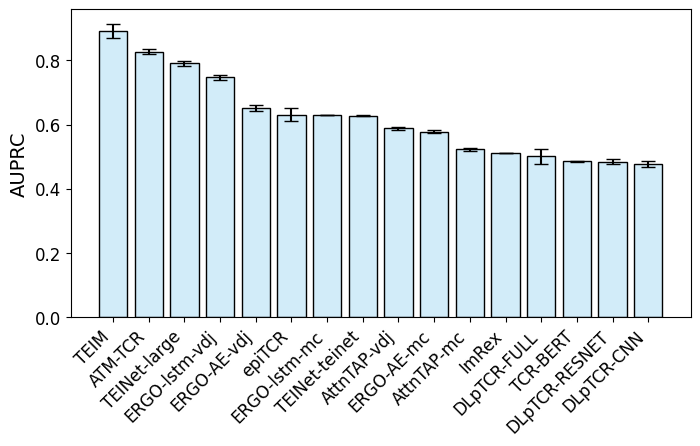

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
six_health=pd.read_csv("./All_results/data/data1/Original_Healthy_six_Epitope.csv")
six_Patient=pd.read_csv("./All_results/data/data1/s1D_Original_patient_six_Epitope.csv")
six_antigen=pd.read_csv("./All_results/data/data1/s1F_Original_antigen_specificity_six_Epitope.csv")
df_list = [six_health, six_Patient, six_antigen]
df_mean = pd.concat(df_list).groupby('models').mean().reset_index()
df_std = pd.concat(df_list).groupby('models').std().reset_index()
df_mean = df_mean.sort_values(by='AUPRC', ascending=False)
df_std = df_std.loc[df_mean.index] 
df_mean.to_csv("./All_results/data/data1/1sJ_Average_six_epitopes_three_negative.csv")
plt.figure(figsize=(8, 4))
bars = plt.bar(df_mean['models'], df_mean['AUPRC'], yerr=df_std['AUPRC'], capsize=5, color='#d2ecf9', edgecolor='black')
plt.ylabel('AUPRC', fontsize=14)
#plt.title('Average AUPRC of six epitopes under three negative data sources', fontsize=12)
plt.xticks(fontsize=12, rotation=45, ha='right', va='top')
plt.yticks(fontsize=12)
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'J_Average_six_epitopes_three_negative.pdf', bbox_inches='tight')
plt.show()

# k

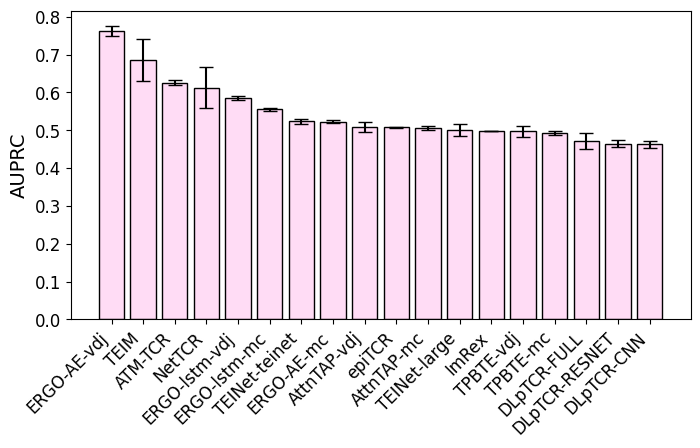

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
six_health=pd.read_csv("./All_results/data/data1/Original_Healthy_unseen_Epitope.csv")
six_Patient=pd.read_csv("./All_results/data/data1/1sG_Original_Diseases_unseen_Epitope.csv")
six_antigen=pd.read_csv("./All_results/data/data1/1sH_Original_antigen_specificity_unseen_Epitope.csv")
df_list = [six_health, six_Patient, six_antigen]
df_mean = pd.concat(df_list).groupby('models').mean().reset_index()
df_std = pd.concat(df_list).groupby('models').std().reset_index()
df_mean = df_mean.sort_values(by='AUPRC', ascending=False)
df_std = df_std.loc[df_mean.index] 
df_mean.to_csv("./All_results/data/data1/1sK_Average_unseen_epitopes_three_negative.csv")
plt.figure(figsize=(8, 4))
bars = plt.bar(df_mean['models'], df_mean['AUPRC'], yerr=df_std['AUPRC'], capsize=5, color='#ffdcf5', edgecolor='black')
plt.ylabel('AUPRC', fontsize=14)
#plt.title('Average AUPRC of unseen epitopes under three negative data sources', fontsize=12)
plt.xticks(fontsize=12, rotation=45, ha='right', va='top')
plt.yticks(fontsize=12)
path = "./All_results/fig/fig1s/"
plt.savefig(path + 'K_Average_unseen_epitopes_three_negative.pdf', bbox_inches='tight')
plt.show()